# Table of content

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)<br/>
    - 3.4 [Post Profiling](#section304)<br/>
4. [Questions](#section4)
    - 4.1 [Off all the passengers, how many survived and how many died?](#section401)<br/>
    - 4.2 [Who is more likely to survive, Male or Female?](#section402)<br/>
    - 4.3 [What is the rate of survival of males, females and child on the basis of Passenger Class?](#section403)<br/>
    - 4.4 [What is the survival rate considering the Embarked variable?](#section404)<br/>
    - 4.5 [Survival rate - Comparing Embarked and Sex.](#section405)<br/>
    - 4.6 [How survival rate vary with Embarked, Sex and Pclass](#section406)<br/>
    - 4.7 [Segment age in bins with size 10.](#section407)<br/>
    - 4.8 [Analysing SibSp and Parch variable.](#section408)<br/>
    - 4.9 [Segment fare in bins of size 12.](#section409)<br/>
    - 4.10 [Draw pair plot to know the joint relationship between 'Fare','Age','Pclass' and 'Survived'](#section410)<br/>
    - 4.11 [Establish coorelation between all the features using heatmap.](#section411)<br/>
    - 4.12 [Hypothesis: Women and children are more likely to survive](#section412)<br/>
5. [Conclusions](#section5)<br/>  

<a id='section1'/>

### 1. Problem Statement

EDA for Car sales data.

<a id='section2'/>

### 2. Data Loading and Description

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from subprocess import check_output

In [2]:
car_sales = pd.read_csv(r'C:\INSAID\Term1\Project\Term-1\Data\Projects\car_sales.csv', encoding='latin-1')
car_sales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [3]:
car_sales.shape

(9576, 10)

In [4]:
car_sales.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [5]:
car_sales.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [6]:
car_sales[car_sales.engV == 90]

,car,price,body,mileage,engV,engType,registration,year,model,drive
3254,Renault,6100.0,van,280,90.0,Diesel,yes,2008,Kangoo ïàññ.,front


In [7]:
carlist=car_sales.car.unique()
carlist.sort()
carlist

array(['Acura', 'Alfa Romeo', 'Aro', 'Aston Martin', 'Audi', 'BMW', 'BYD',
       'Barkas', 'Bentley', 'Bogdan', 'Buick', 'Cadillac', 'Changan',
       'Chery', 'Chevrolet', 'Chrysler', 'Citroen', 'Dacia', 'Dadi',
       'Daewoo', 'Daihatsu', 'Dodge', 'FAW', 'Ferrari', 'Fiat', 'Fisker',
       'Ford', 'GAZ', 'GMC', 'Geely', 'Great Wall', 'Groz', 'Hafei',
       'Honda', 'Huanghai', 'Hummer', 'Hyundai', 'Infiniti', 'Isuzu',
       'JAC', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Lancia',
       'Land Rover', 'Lexus', 'Lifan', 'Lincoln', 'MG', 'MINI',
       'Maserati', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi',
       'Moskvich-AZLK', 'Moskvich-Izh', 'Nissan', 'Opel', 'Other-Retro',
       'Peugeot', 'Porsche', 'Renault', 'Rolls-Royce', 'Rover', 'SMA',
       'Saab', 'Samand', 'Samsung', 'Seat', 'Skoda', 'Smart', 'SsangYong',
       'Subaru', 'Suzuki', 'TATA', 'Tesla', 'Toyota', 'UAZ', 'VAZ',
       'Volkswagen', 'Volvo', 'Wartburg', 'ZAZ', 'ZX', 'ËUAZ'],
      dtype=object)

In [8]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [9]:
car_sales.car.unique()
carlist.sort()
carlist

array(['Acura', 'Alfa Romeo', 'Aro', 'Aston Martin', 'Audi', 'BMW', 'BYD',
       'Barkas', 'Bentley', 'Bogdan', 'Buick', 'Cadillac', 'Changan',
       'Chery', 'Chevrolet', 'Chrysler', 'Citroen', 'Dacia', 'Dadi',
       'Daewoo', 'Daihatsu', 'Dodge', 'FAW', 'Ferrari', 'Fiat', 'Fisker',
       'Ford', 'GAZ', 'GMC', 'Geely', 'Great Wall', 'Groz', 'Hafei',
       'Honda', 'Huanghai', 'Hummer', 'Hyundai', 'Infiniti', 'Isuzu',
       'JAC', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Lancia',
       'Land Rover', 'Lexus', 'Lifan', 'Lincoln', 'MG', 'MINI',
       'Maserati', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi',
       'Moskvich-AZLK', 'Moskvich-Izh', 'Nissan', 'Opel', 'Other-Retro',
       'Peugeot', 'Porsche', 'Renault', 'Rolls-Royce', 'Rover', 'SMA',
       'Saab', 'Samand', 'Samsung', 'Seat', 'Skoda', 'Smart', 'SsangYong',
       'Subaru', 'Suzuki', 'TATA', 'Tesla', 'Toyota', 'UAZ', 'VAZ',
       'Volkswagen', 'Volvo', 'Wartburg', 'ZAZ', 'ZX', 'ËUAZ'],
      dtype=object)

In [10]:
year = car_sales.year.unique()
year.sort()
year

array([1953, 1958, 1959, 1961, 1962, 1963, 1964, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016], dtype=int64)

In [11]:
car_sales.engType.unique()

array(['Gas', 'Petrol', 'Diesel', 'Other'], dtype=object)

In [12]:
car_sales.drive.unique()

array(['full', 'rear', 'front', nan], dtype=object)

In [13]:
car_sales.body.unique()

array(['crossover', 'sedan', 'other', 'van', 'vagon', 'hatch'],
      dtype=object)

In [14]:
profile = pandas_profiling.ProfileReport(car_sales)
profile.to_file(outputfile="car_sales_before_preprocessing.html")

In [15]:
car_sales[car_sales.price == 0].price.value_counts()

0.0    267
Name: price, dtype: int64

In [16]:
byEngType = car_sales.groupby('engType')
byEngType.count()

,car,price,body,mileage,engV,registration,year,model,drive
engType,,,,,,,,,
Diesel,3013,3013,3013,3013,2954,3013,3013,3013,2881
Gas,1722,1722,1722,1722,1663,1722,1722,1722,1656
Other,462,462,462,462,274,462,462,462,347
Petrol,4379,4379,4379,4379,4251,4379,4379,4379,4181


In [17]:
car_sales[(car_sales['drive'].isnull())]

,car,price,body,mileage,engV,engType,registration,year,model,drive
4,Mercedes-Benz,33000.00,vagon,91,NaN,Other,yes,2013,E-Class,NaN
37,Audi,2850.00,sedan,260,NaN,Other,no,1999,A6,NaN
44,BMW,39333.00,sedan,6,2.00,Petrol,yes,2016,520,NaN
52,Mercedes-Benz,31500.00,sedan,123,2.20,Diesel,yes,2011,E-Class,NaN
103,Volkswagen,10000.00,van,231,1.90,Diesel,yes,2005,T5 (Transporter) ïàññ.,NaN
109,Nissan,12400.00,hatch,26,NaN,Other,yes,2011,Leaf,NaN
119,Mercedes-Benz,29500.00,sedan,37,1.80,Petrol,yes,2012,E-Class,NaN
137,Mercedes-Benz,93555.00,crossover,0,NaN,Other,yes,2016,GLS 350,NaN
154,Nissan,17700.00,crossover,40,1.60,Petrol,yes,2014,Qashqai,NaN
163,Mercedes-Benz,17900.00,van,167,2.20,Diesel,yes,2012,Vito ãðóç.,NaN


In [18]:
car_sales[(car_sales['engV'].isnull())]

,car,price,body,mileage,engV,engType,registration,year,model,drive
4,Mercedes-Benz,33000.000,vagon,91,NaN,Other,yes,2013,E-Class,NaN
13,BMW,4700.000,sedan,200,NaN,Petrol,yes,1996,316,rear
30,Nissan,13980.000,hatch,31,NaN,Other,yes,2013,Leaf,front
31,Nissan,17300.000,hatch,24,NaN,Other,yes,2013,Leaf,front
37,Audi,2850.000,sedan,260,NaN,Other,no,1999,A6,NaN
41,Nissan,13275.000,hatch,12,NaN,Other,yes,2013,Leaf,front
56,Nissan,17000.000,hatch,38,NaN,Other,yes,2013,Leaf,front
107,Volkswagen,33500.000,crossover,98,NaN,Petrol,yes,2013,Touareg,full
109,Nissan,12400.000,hatch,26,NaN,Other,yes,2011,Leaf,NaN
137,Mercedes-Benz,93555.000,crossover,0,NaN,Other,yes,2016,GLS 350,NaN


In [19]:
# car_sales_redu = car_sales.copy()
# car_sales_redu.sort_values(inplace=True,by=['body','engType'])
# car_sales_redu.drop(['car','price','mileage','registration','engV','year','model'], inplace=True,axis=1 )
# multiindex_carsales = car_sales_redu.set_index(['body','engType'])
# multiindex_carsales.sort_index(inplace=True)
# # multiindex_carsales.drop(['body','price','mileage','registration','engV','year'], inplace=True,axis=1 )
# multiindex_carsales[multiindex_carsales['drive'].isnull()]

In [20]:
car_sales.body.value_counts()

sedan        3646
crossover    2069
hatch        1252
van          1049
other         838
vagon         722
Name: body, dtype: int64

In [21]:
for engT in car_sales.engType.unique():
    for bodyT in car_sales.body.unique():
        print("Drive data for Engine Type {0} and BodyType {1}".format(engT,bodyT))
        print(car_sales[(car_sales.engType == engT)&(car_sales.body == bodyT)].drive.value_counts())

Drive data for Engine Type Gas and BodyType crossover
full     383
front     24
rear       1
Name: drive, dtype: int64
Drive data for Engine Type Gas and BodyType sedan
front    624
rear     176
full      33
Name: drive, dtype: int64
Drive data for Engine Type Gas and BodyType other
front    45
full     19
rear     15
Name: drive, dtype: int64
Drive data for Engine Type Gas and BodyType van
front    40
rear     10
full      2
Name: drive, dtype: int64
Drive data for Engine Type Gas and BodyType vagon
front    61
full     19
rear     14
Name: drive, dtype: int64
Drive data for Engine Type Gas and BodyType hatch
front    181
rear       5
full       4
Name: drive, dtype: int64
Drive data for Engine Type Petrol and BodyType crossover
full     725
front     78
rear       4
Name: drive, dtype: int64
Drive data for Engine Type Petrol and BodyType sedan
front    1366
rear      428
full      177
Name: drive, dtype: int64
Drive data for Engine Type Petrol and BodyType other
rear     160
front   

In [22]:
engV_list = car_sales.engV.unique()
engV_list.sort()
engV_list

array([ 0.1 ,  0.11,  0.14,  0.6 ,  0.65,  0.7 ,  0.8 ,  0.9 ,  1.  ,
        1.1 ,  1.12,  1.2 ,  1.23,  1.24,  1.25,  1.3 ,  1.31,  1.33,
        1.34,  1.35,  1.36,  1.39,  1.4 ,  1.45,  1.46,  1.5 ,  1.59,
        1.6 ,  1.7 ,  1.78,  1.79,  1.8 ,  1.9 ,  1.91,  2.  ,  2.1 ,
        2.14,  2.15,  2.17,  2.2 ,  2.28,  2.3 ,  2.4 ,  2.44,  2.46,
        2.49,  2.5 ,  2.57,  2.6 ,  2.69,  2.7 ,  2.8 ,  2.9 ,  2.98,
        2.99,  3.  ,  3.1 ,  3.2 ,  3.3 ,  3.4 ,  3.5 ,  3.6 ,  3.7 ,
        3.8 ,  4.  ,  4.2 ,  4.25,  4.3 ,  4.39,  4.4 ,  4.5 ,  4.6 ,
        4.66,  4.67,  4.7 ,  4.8 ,  5.  ,  5.2 ,  5.3 ,  5.4 ,  5.46,
        5.5 ,  5.6 ,  5.7 ,  6.  ,  6.1 ,  6.2 ,  6.3 ,  6.4 ,  6.5 ,
        6.75,  7.  ,  7.2 ,  8.  ,  8.3 ,  8.7 ,  9.  , 10.  , 11.5 ,
       12.  , 14.  , 15.  , 17.  , 18.  , 19.  , 20.  , 22.  , 28.  ,
       30.  , 55.  , 66.  , 70.  , 74.  , 75.  , 85.  , 90.  , 99.99,
         nan])

In [23]:
car_sales.loc[car_sales[(car_sales.price <= 0)].index,'price'] = np.NaN

In [24]:
car_sales.loc[car_sales[(car_sales.engV >= 10)|(car_sales.engV <= 0.8)].index,'engV'] = np.NaN
# car_sales.loc[car_sales[car_sales.engV == 90].index,'engV'] = np.NaN
# car_sales.loc[car_sales[car_sales.engV == 85].index,'engV'] = np.NaN
# car_sales.loc[car_sales[car_sales.engV == 75].index,'engV'] = np.NaN
# car_sales.loc[car_sales[car_sales.engV == 74].index,'engV'] = np.NaN
# car_sales.loc[car_sales[car_sales.engV == 70].index,'engV'] = np.NaN
# car_sales.loc[car_sales[car_sales.engV == 66].index,'engV'] = np.NaN
# car_sales.loc[car_sales[car_sales.engV == 55].index,'engV'] = np.NaN

In [25]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9309 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9017 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [26]:
car_sales.describe()

,price,mileage,engV,year
count,9309.000000,9576.000000,9017.000000,9576.000000
mean,16081.710884,138.862364,2.260857,2006.605994
std,24301.899483,98.629754,0.980058,7.067924
min,259.350000,0.000000,0.900000,1953.000000
25%,5400.000000,70.000000,1.600000,2004.000000
50%,9500.000000,128.000000,2.000000,2008.000000
75%,17000.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,9.000000,2016.000000


In [27]:
drouped_car_sales = car_sales.groupby(by=['car','model'])
print(drouped_car_sales.engV.median())

car           model       
Acura         MDX             3.70
              RL              3.50
              TL              3.20
              TLX             2.40
              ZDX             3.70
Alfa Romeo    147             1.60
              156             1.85
              159             2.20
              33              1.70
              75              1.60
              Giulietta       1.40
Aro           10              1.40
Aston Martin  DB9             6.00
              Rapide          6.00
Audi          100             2.30
              80              1.80
              90              2.00
              A1              1.20
              A3              1.40
              A4              1.90
              A4 Allroad      2.00
              A5              2.00
              A6              2.50
              A6 Allroad      2.70
              A7              3.00
              A8              3.70
              Q3              2.00
              Q5            

In [28]:
idx_drive = drouped_car_sales.drive.value_counts()['Acura','MDX']
idx_drive[idx_drive == idx_drive.max()].index[0]
print(idx_drive)

drive
full    5
Name: drive, dtype: int64


In [29]:
try:
    idx_engV = drouped_car_sales.engV.median()['Acura','MDX']
    print(idx_engV)
except KeyError:
    print('Key does not exist')

3.7


In [30]:
drouped_car_sales.price.median()['Acura','MDX']

17200.0

In [31]:
car_sales[car_sales.engV >= 10]

,car,price,body,mileage,engV,engType,registration,year,model,drive


In [32]:

for carT in car_sales.car.unique():
    for modelT in car_sales[(car_sales.car == carT)].model.unique():
        print("Drive data for car {1} and Model {0}".format(modelT,carT))
        try:
            idx_engV = drouped_car_sales.engV.median()[carT,modelT]
            idx_price = drouped_car_sales.price.median()[carT,modelT]
            idx_drive = drouped_car_sales.drive.value_counts()[carT,modelT]
            value_price = idx_price
            value_engV = round(idx_engV,1)
            value_drive = idx_drive[idx_drive == idx_drive.max()].index[0]
            values = {'engV':value_engV,'drive':value_drive,'price':value_price}
            print(values)
            car_sales.loc[(car_sales.model == modelT)&(car_sales.car == carT)] = car_sales.loc[(car_sales.model == modelT)&(car_sales.car == carT)].fillna(values)

        except KeyError:
            print('Key does not exist')
        except IndexError:
            print('Index does not exist')


Drive data for car Ford and Model Kuga
{'engV': 2.5, 'drive': 'full', 'price': 17600.0}
Drive data for car Ford and Model Focus
{'engV': 1.6, 'drive': 'front', 'price': 9950.0}
Drive data for car Ford and Model Fiesta
{'engV': 1.4, 'drive': 'front', 'price': 8700.0}
Drive data for car Ford and Model Mondeo
{'engV': 2.0, 'drive': 'front', 'price': 11200.0}
Drive data for car Ford and Model Scorpio
{'engV': 2.0, 'drive': 'rear', 'price': 2200.0}
Drive data for car Ford and Model Mustang GT
{'engV': 4.8, 'drive': 'rear', 'price': 40950.0}
Drive data for car Ford and Model C-Max
{'engV': 1.6, 'drive': 'front', 'price': 7200.0}
Drive data for car Ford and Model Mustang
{'engV': 3.2, 'drive': 'rear', 'price': 45000.0}
Drive data for car Ford and Model Transit ãðóç.
{'engV': 2.2, 'drive': 'front', 'price': 8899.5}
Drive data for car Ford and Model Transit ïàññ.
{'engV': 2.2, 'drive': 'rear', 'price': 5300.0}
Drive data for car Ford and Model Transit Connect ïàññ.
{'engV': 1.8, 'drive': 'front

Drive data for car Mercedes-Benz and Model Sprinter 208 ïàññ.
{'engV': 2.2, 'drive': 'front', 'price': 6000.0}
Drive data for car Mercedes-Benz and Model Sprinter 316 ãðóç.
{'engV': 2.2, 'drive': 'rear', 'price': 17999.0}
Drive data for car Mercedes-Benz and Model GL 450
{'engV': 4.7, 'drive': 'full', 'price': 28845.0}
Drive data for car Mercedes-Benz and Model G 55 AMG
{'engV': 5.5, 'drive': 'full', 'price': 60000.0}
Drive data for car Mercedes-Benz and Model ML 250
{'engV': 2.2, 'drive': 'full', 'price': 30000.0}
Drive data for car Mercedes-Benz and Model Sprinter 311 ïàññ.
Key does not exist
Drive data for car Mercedes-Benz and Model S 400
{'engV': 3.5, 'drive': 'full', 'price': 15299.5}
Drive data for car Mercedes-Benz and Model GLS 400
{'engV': 3.0, 'drive': 'full', 'price': 124000.0}
Drive data for car Mercedes-Benz and Model GLC-Class
{'engV': 2.2, 'drive': 'full', 'price': 60999.0}
Drive data for car Mercedes-Benz and Model Sprinter 319 ãðóç.
{'engV': 2.2, 'drive': 'rear', 'pri

{'engV': 1.5, 'drive': 'front', 'price': 4750.0}
Drive data for car Nissan and Model Vanette ïàññ.
Key does not exist
Drive data for car Nissan and Model 350Z
{'engV': 3.5, 'drive': 'rear', 'price': 19500.0}
Drive data for car Nissan and Model Terrano
{'engV': 2.6, 'drive': 'full', 'price': 7099.5}
Drive data for car Nissan and Model Primastar ïàññ.
{'engV': 1.9, 'drive': 'front', 'price': 8050.0}
Drive data for car Nissan and Model NV
{'engV': 1.5, 'drive': 'front', 'price': 8555.0}
Drive data for car Nissan and Model Altima
{'engV': 3.5, 'drive': 'front', 'price': 15000.0}
Drive data for car Nissan and Model Cefiro
{'engV': 2.5, 'drive': 'front', 'price': 2700.0}
Drive data for car Nissan and Model Bluebird
{'engV': 2.0, 'drive': 'front', 'price': 2350.0}
Drive data for car Nissan and Model Primastar ãðóç.
{'engV': 2.0, 'drive': 'front', 'price': 9775.0}
Drive data for car Nissan and Model Gloria
{'engV': 3.0, 'drive': 'rear', 'price': 7200.0}
Drive data for car Nissan and Model Elgr

{'engV': nan, 'drive': 'rear', 'price': 7000.0}
Drive data for car BMW and Model 324
{'engV': 2.4, 'drive': 'rear', 'price': 2200.0}
Drive data for car BMW and Model 118
{'engV': 2.0, 'drive': 'rear', 'price': 11600.0}
Drive data for car BMW and Model 120
{'engV': 2.0, 'drive': 'rear', 'price': 3500.0}
Drive data for car BMW and Model 335
{'engV': 3.0, 'drive': 'rear', 'price': 20617.5}
Drive data for car BMW and Model 545
{'engV': 4.4, 'drive': 'rear', 'price': 18777.0}
Drive data for car BMW and Model 428
{'engV': 2.0, 'drive': 'rear', 'price': 37500.0}
Drive data for car BMW and Model 760
{'engV': 6.0, 'drive': 'rear', 'price': 19750.0}
Drive data for car BMW and Model 4 Series Gran Coupe
{'engV': 2.0, 'drive': 'full', 'price': 52222.0}
Drive data for car BMW and Model 524
{'engV': 2.4, 'drive': 'rear', 'price': 2899.0}
Drive data for car BMW and Model 650
{'engV': 4.8, 'drive': 'rear', 'price': 22000.0}
Drive data for car BMW and Model 6 Series Gran Coupe
{'engV': 3.0, 'drive': 'fu

Drive data for car Audi and Model R8
{'engV': 4.7, 'drive': 'full', 'price': 72450.0}
Drive data for car Chrysler and Model Sebring
{'engV': 2.6, 'drive': 'front', 'price': 8900.0}
Drive data for car Chrysler and Model 300 C
{'engV': 3.5, 'drive': 'rear', 'price': 13800.0}
Drive data for car Chrysler and Model PT Cruiser
{'engV': 2.2, 'drive': 'front', 'price': 9700.0}
Drive data for car Chrysler and Model Stratus
{'engV': 2.5, 'drive': 'front', 'price': 3900.0}
Drive data for car Chrysler and Model Crossfire
{'engV': 3.2, 'drive': 'front', 'price': 8000.0}
Drive data for car Chrysler and Model Grand Voyager
{'engV': 2.5, 'drive': 'front', 'price': 3300.0}
Drive data for car Chrysler and Model Pacifica
{'engV': 3.5, 'drive': 'full', 'price': 13500.0}
Drive data for car Chrysler and Model Voyager
{'engV': 2.5, 'drive': 'front', 'price': 4950.0}
Drive data for car Chrysler and Model 300 M
{'engV': 3.5, 'drive': 'front', 'price': 2700.0}
Drive data for car Chrysler and Model LHS
{'engV': 

Drive data for car Toyota and Model Carina
{'engV': 1.7, 'drive': 'front', 'price': 3250.0}
Drive data for car Toyota and Model Matrix
{'engV': 1.8, 'drive': 'front', 'price': 9000.0}
Drive data for car Toyota and Model Vista
{'engV': 2.0, 'drive': 'front', 'price': 8500.0}
Drive data for car Toyota and Model 4Runner
{'engV': 4.0, 'drive': 'full', 'price': 42000.0}
Drive data for car Toyota and Model Fortuner
{'engV': 4.0, 'drive': 'full', 'price': 14900.0}
Drive data for car Toyota and Model Scion
{'engV': 1.5, 'drive': 'front', 'price': 10200.0}
Drive data for car Toyota and Model Land Cruiser 76
{'engV': 4.2, 'drive': 'full', 'price': 63000.0}
Drive data for car Toyota and Model Previa
{'engV': 2.4, 'drive': 'front', 'price': 20000.0}
Drive data for car Hyundai and Model Accent
{'engV': 1.4, 'drive': 'front', 'price': 7000.0}
Drive data for car Hyundai and Model Tucson
{'engV': 2.0, 'drive': 'full', 'price': 11300.0}
Drive data for car Hyundai and Model Santa FE
{'engV': 2.2, 'drive

Drive data for car Mazda and Model 3
{'engV': 1.6, 'drive': 'front', 'price': 8100.0}
Drive data for car Mazda and Model 6
{'engV': 2.0, 'drive': 'front', 'price': 11400.0}
Drive data for car Mazda and Model 626
{'engV': 2.0, 'drive': 'front', 'price': 2800.0}
Drive data for car Mazda and Model CX-7
{'engV': 2.3, 'drive': 'full', 'price': 11949.5}
Drive data for car Mazda and Model CX-9
{'engV': 3.7, 'drive': 'full', 'price': 15799.5}
Drive data for car Mazda and Model RX-8
{'engV': 1.3, 'drive': 'rear', 'price': 6500.0}
Drive data for car Mazda and Model 5
{'engV': 2.0, 'drive': 'front', 'price': 10800.0}
Drive data for car Mazda and Model 323
{'engV': 1.5, 'drive': 'front', 'price': 1750.0}
Drive data for car Mazda and Model Xedos 6
{'engV': 2.0, 'drive': 'front', 'price': 3550.0}
Drive data for car Mazda and Model 6 MPS
{'engV': 2.3, 'drive': 'full', 'price': 9638.5}
Drive data for car Mazda and Model MPV
{'engV': 2.0, 'drive': 'front', 'price': 6799.0}
Drive data for car Mazda and 

Drive data for car Alfa Romeo and Model 147
{'engV': 1.6, 'drive': 'front', 'price': 5900.0}
Drive data for car Alfa Romeo and Model 159
{'engV': 2.2, 'drive': 'front', 'price': 12050.0}
Drive data for car Alfa Romeo and Model Giulietta
{'engV': 1.4, 'drive': 'front', 'price': 16749.5}
Drive data for car Alfa Romeo and Model 156
{'engV': 1.8, 'drive': 'front', 'price': 2325.0}
Drive data for car Alfa Romeo and Model 75
{'engV': 1.6, 'drive': 'rear', 'price': 2300.0}
Drive data for car Alfa Romeo and Model 33
{'engV': 1.7, 'drive': 'front', 'price': 1800.0}
Drive data for car Smart and Model Fortwo
{'engV': 1.0, 'drive': 'rear', 'price': 6200.0}
Drive data for car Smart and Model Cabrio
{'engV': 1.0, 'drive': 'rear', 'price': 4950.0}
Drive data for car Smart and Model Roadster
{'engV': nan, 'drive': 'rear', 'price': 8300.0}
Drive data for car Smart and Model City
{'engV': nan, 'drive': 'rear', 'price': 4100.0}
Drive data for car Smart and Model Forfour
{'engV': 1.0, 'drive': 'rear', 'pr

Drive data for car Fiat and Model Doblo Panorama
{'engV': 1.4, 'drive': 'front', 'price': 6500.0}
Drive data for car Fiat and Model Tempra
{'engV': 1.6, 'drive': 'front', 'price': 1900.0}
Drive data for car Fiat and Model Qubo ïàññ.
{'engV': 1.4, 'drive': 'front', 'price': 8300.0}
Drive data for car Fiat and Model Bravo
{'engV': 2.0, 'drive': 'front', 'price': 3700.0}
Drive data for car Fiat and Model Stilo
{'engV': 1.6, 'drive': 'front', 'price': 2550.0}
Drive data for car Fiat and Model 125
{'engV': nan, 'drive': 'rear', 'price': 1500.0}
Drive data for car ZAZ and Model Lanos
{'engV': 1.5, 'drive': 'front', 'price': 5450.0}
Drive data for car ZAZ and Model 1102 Òàâðèÿ
{'engV': 1.2, 'drive': 'front', 'price': 1223.375}
Drive data for car ZAZ and Model 1103 Ñëàâóòà
{'engV': 1.2, 'drive': 'front', 'price': 1850.0}
Drive data for car ZAZ and Model Vida
{'engV': 1.5, 'drive': 'front', 'price': 6900.0}
Drive data for car ZAZ and Model 965
{'engV': 1.3, 'drive': 'full', 'price': 4000.0}
Dri

{'engV': 6.0, 'drive': 'rear', 'price': 65000.0}
Drive data for car Aston Martin and Model Rapide
{'engV': 6.0, 'drive': 'rear', 'price': 125000.0}
Drive data for car Rover and Model Range Rover
{'engV': 2.3, 'drive': 'full', 'price': 38500.0}
Drive data for car Rover and Model 200
{'engV': 1.4, 'drive': 'front', 'price': 3200.0}
Drive data for car Rover and Model 75
{'engV': 2.0, 'drive': 'front', 'price': 4175.0}
Drive data for car GAZ and Model 31105
{'engV': 2.3, 'drive': 'rear', 'price': 4400.0}
Drive data for car GAZ and Model 3302 GAZåëü
{'engV': 2.7, 'drive': 'rear', 'price': 6150.0}
Drive data for car GAZ and Model 69
{'engV': nan, 'drive': 'full', 'price': nan}
Drive data for car GAZ and Model 21
{'engV': 2.4, 'drive': 'rear', 'price': 2175.0}
Drive data for car GAZ and Model 2410
{'engV': 2.4, 'drive': 'front', 'price': 1999.0}
Drive data for car GAZ and Model 2705 GAZåëü
{'engV': nan, 'drive': 'rear', 'price': 1400.0}
Drive data for car GAZ and Model 24
{'engV': 3.3, 'drive

In [33]:
car_sales.dropna(inplace=True)

In [34]:
car_sales.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9509,9509.000000,9509,9509.000000,9509.000000,9509,9509,9509.000000,9509,9509
unique,83,NaN,6,NaN,NaN,4,2,NaN,839,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3634,NaN,NaN,4356,8951,NaN,199,5473
mean,NaN,16586.002035,NaN,139.231044,2.254523,NaN,NaN,2006.636345,NaN,NaN
std,NaN,25305.201979,NaN,98.552922,1.026700,NaN,NaN,6.984435,NaN,NaN
min,NaN,259.350000,NaN,0.000000,0.900000,NaN,NaN,1959.000000,NaN,NaN
25%,NaN,5500.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9600.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,17500.000000,NaN,195.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [35]:
car_sales[car_sales.price > 300000]

,car,price,body,mileage,engV,engType,registration,year,model,drive
1611,Bentley,499999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full
2637,Bentley,499999.0,crossover,1,6.00,Petrol,yes,2016,Bentayga,full
4134,Bentley,449999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full
7621,Bentley,547800.0,sedan,0,6.75,Petrol,yes,2016,Mulsanne,rear
7914,Bentley,499999.0,crossover,0,6.00,Petrol,yes,2016,Bentayga,full


In [36]:
# print(car_sales.engV.isnull()|car_sales.drive.isnull())
car_sales[car_sales.engV.isnull()|car_sales.drive.isnull()]

,car,price,body,mileage,engV,engType,registration,year,model,drive


AxesSubplot(0.125,0.11;0.775x0.77)


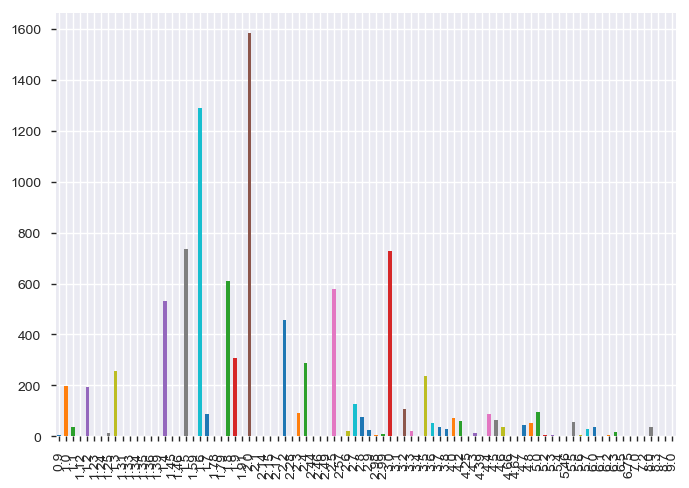

In [37]:
print(car_sales.engV.value_counts().sort_index().plot.bar())


AxesSubplot(0.125,0.11;0.775x0.77)


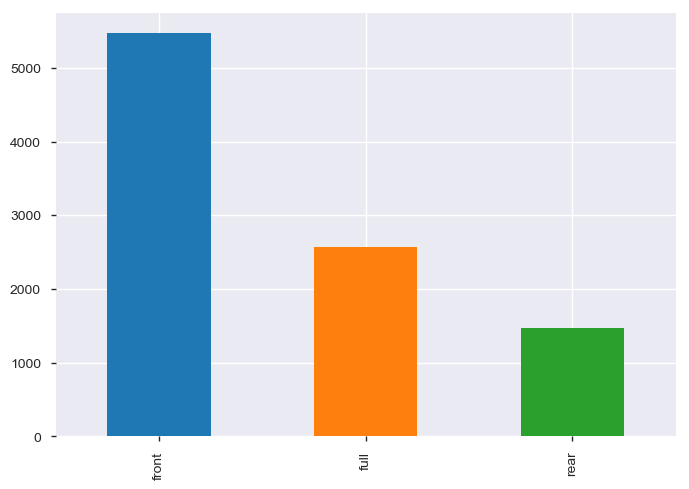

In [38]:
print(car_sales.drive.value_counts().plot.bar())

In [39]:
car_sales.describe(include='all')

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9509,9509.000000,9509,9509.000000,9509.000000,9509,9509,9509.000000,9509,9509
unique,83,NaN,6,NaN,NaN,4,2,NaN,839,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3634,NaN,NaN,4356,8951,NaN,199,5473
mean,NaN,16586.002035,NaN,139.231044,2.254523,NaN,NaN,2006.636345,NaN,NaN
std,NaN,25305.201979,NaN,98.552922,1.026700,NaN,NaN,6.984435,NaN,NaN
min,NaN,259.350000,NaN,0.000000,0.900000,NaN,NaN,1959.000000,NaN,NaN
25%,NaN,5500.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9600.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,17500.000000,NaN,195.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [40]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9509 entries, 0 to 9575
Data columns (total 10 columns):
car             9509 non-null object
price           9509 non-null float64
body            9509 non-null object
mileage         9509 non-null int64
engV            9509 non-null float64
engType         9509 non-null object
registration    9509 non-null object
year            9509 non-null int64
model           9509 non-null object
drive           9509 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 817.2+ KB


Adding engV_cat column with engV values<br/>
0 - 2    Low Power<br/>
2 - 4    Moderate Power<br/>
4 - 6    High Power<br/>
6 +      Extreme Power<br/>

In [41]:
def engVCategory(engV):
#     print(engV)

    if engV <= 2:
        cat = 'Low'
    elif engV > 2 and engV <= 4:
        cat = 'Moderate'
    elif engV > 4 and engV <= 6:
        cat = 'High'
    elif engV > 6:
        cat = 'Extreme'
    else:
        cat = 'undefined'
    return cat

car_sales['engV_cat'] = car_sales.engV.apply(engVCategory) 

car_sales[car_sales['engV_cat'] == 'Extreme'].engV.value_counts()

8.00    36
6.30    16
6.20     7
6.75     3
7.00     3
6.10     2
8.70     1
8.30     1
7.20     1
9.00     1
6.50     1
Name: engV, dtype: int64

In [42]:
car_sales['age'] = car_sales.year.apply(lambda x: 2018-x) 
car_sales['age_Group'] = pd.cut(car_sales['age'].dropna(),
                         [0,10,20,30,40,50,60],
                         labels=['<10','10-19','20-29','30-39','40-49','50-59'], include_lowest=True)
car_sales.age_Group.value_counts().sort_index()

<10      5060
10-19    3483
20-29     761
30-39     177
40-49      21
50-59       7
Name: age_Group, dtype: int64

Text(0.5,1,'Age Group vs Body')

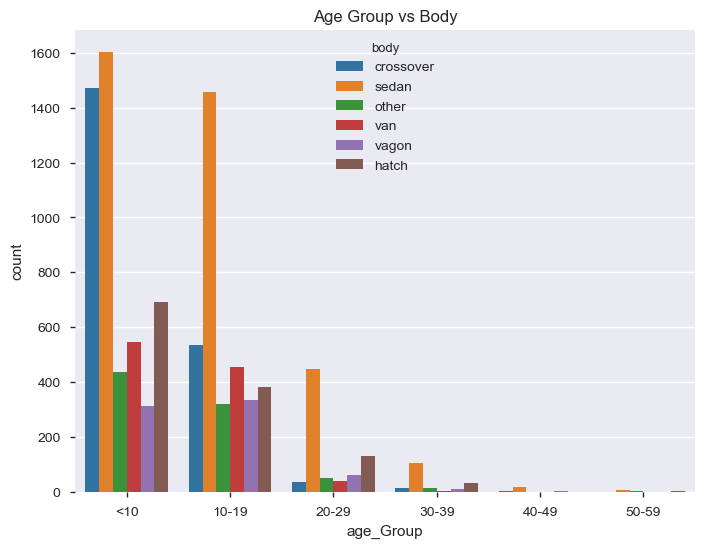

In [43]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = car_sales,x = 'age_Group', hue='body')
plt.title('Age Group vs Body')

In [44]:

def PriceCategory(price):
    if price >= 0 and price <= 10000:
        cat = 'Low'
    if price > 10000 and price <= 50000:
        cat = 'Moderate'
    if price > 50000 and price <= 100000:
        cat = 'High'
    if price > 100000:
        cat = 'Extreme'
    return cat

car_sales['price_cat'] = car_sales.price.apply(PriceCategory) 

car_sales.price_cat.value_counts()

Low         4986
Moderate    3978
High         390
Extreme      155
Name: price_cat, dtype: int64

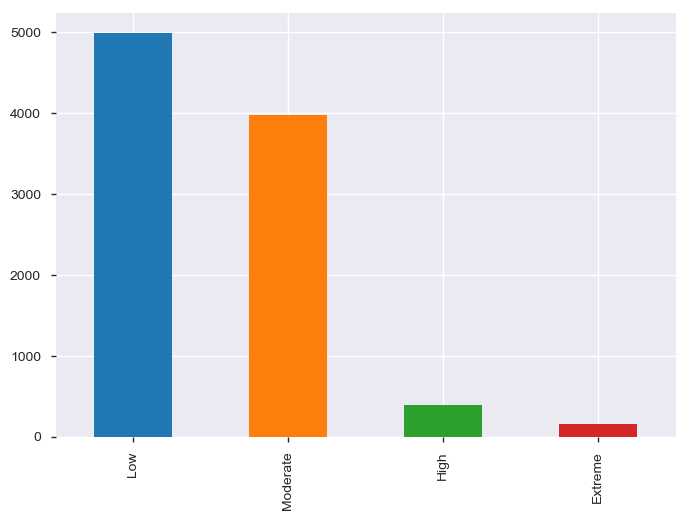

In [45]:
car_sales.price_cat.value_counts().plot.bar()

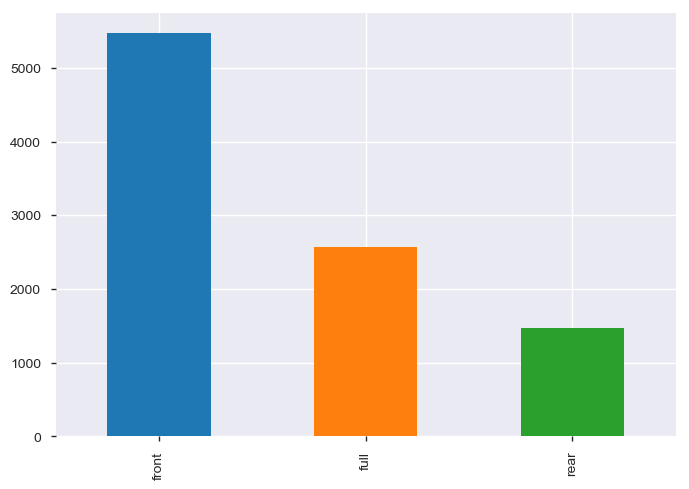

In [46]:
car_sales.drive.value_counts().plot.bar()

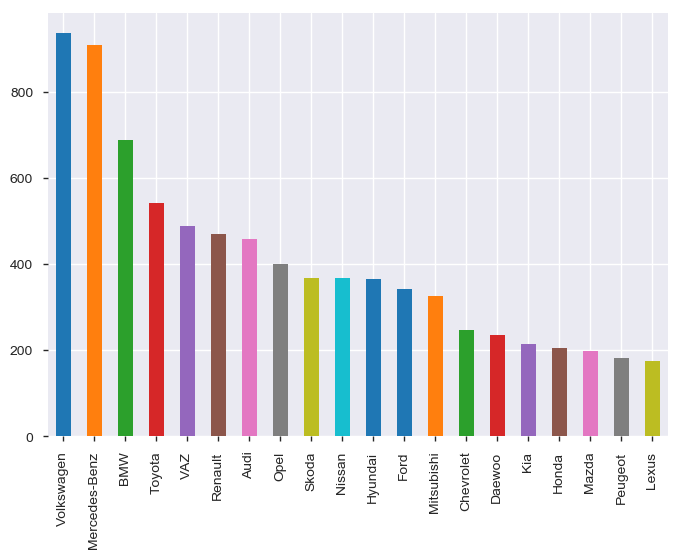

In [47]:
car_sales.car.value_counts().head(20).plot.bar()

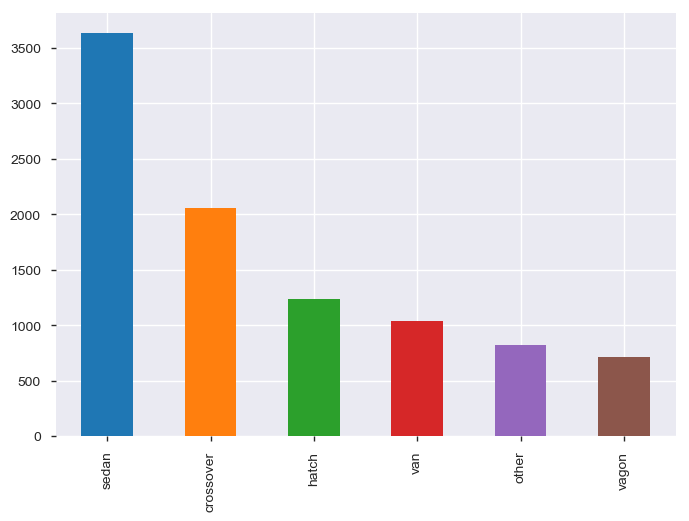

In [48]:
car_sales.body.value_counts().head(20).plot.bar()

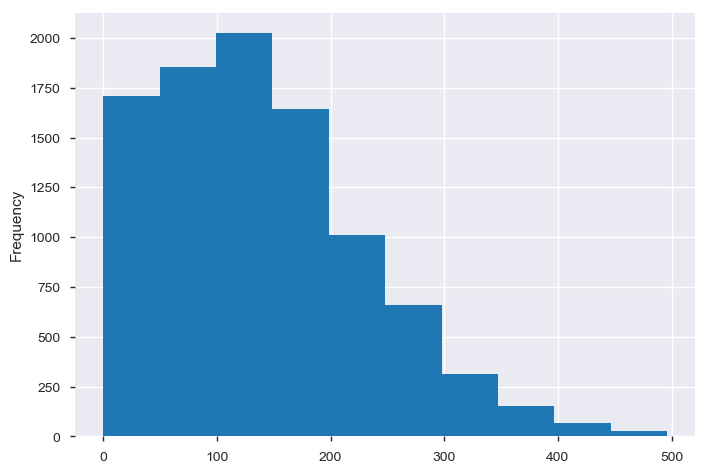

In [49]:
car_sales[car_sales.mileage < 500].mileage.plot.hist()

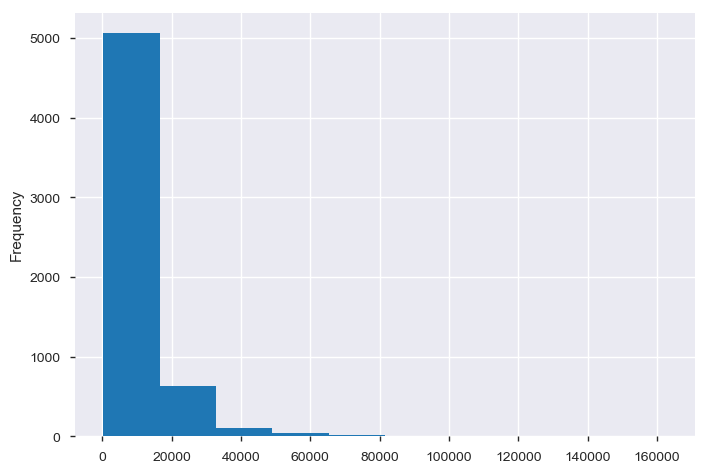

In [50]:
car_sales[car_sales.engV_cat == 'Low'].price.plot.hist()

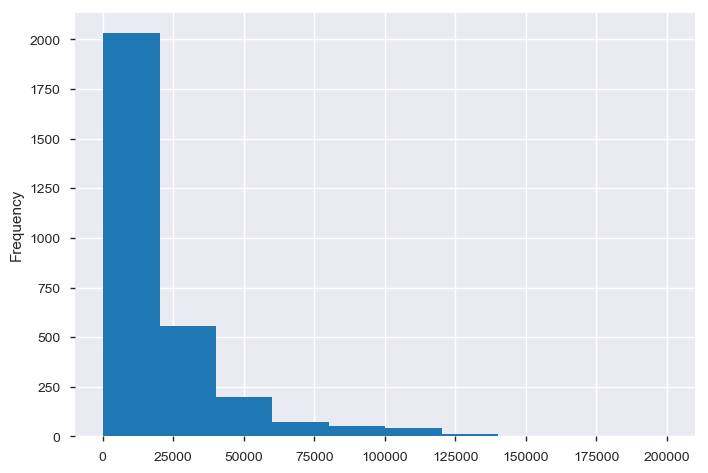

In [51]:
car_sales[car_sales.engV_cat == 'Moderate'].price.plot.hist()

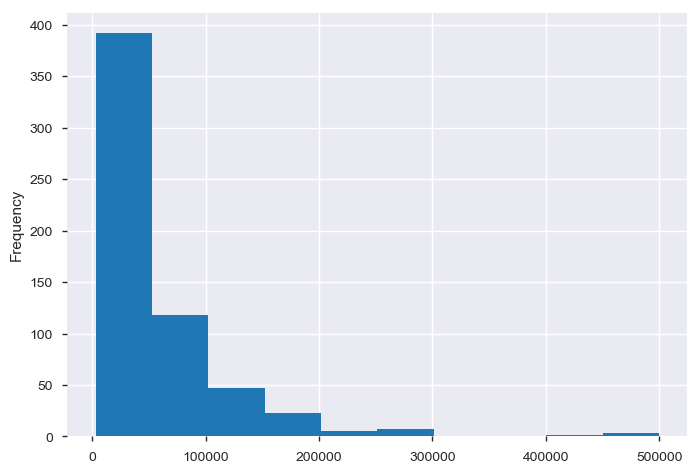

In [52]:
car_sales[car_sales.engV_cat == 'High'].price.plot.hist()

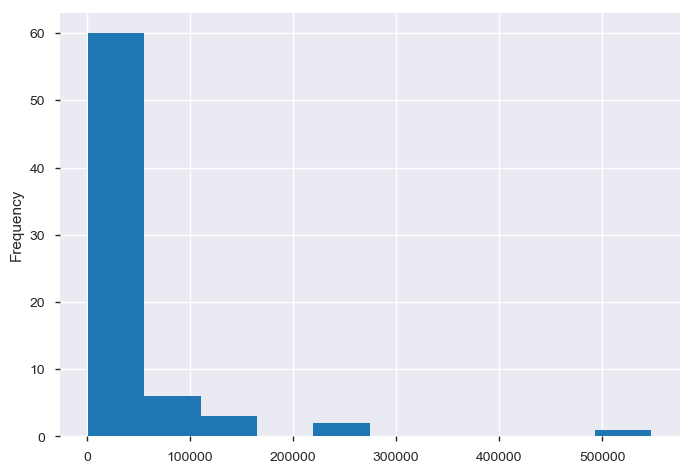

In [53]:
car_sales[car_sales.engV_cat == 'Extreme'].price.plot.hist()

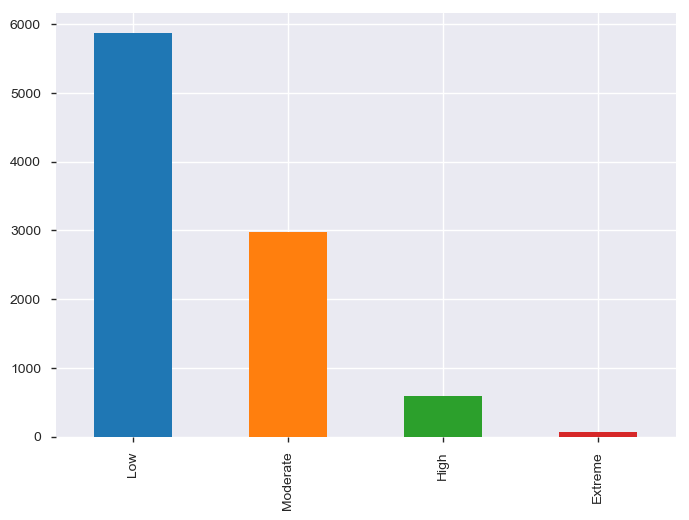

In [54]:
car_sales.engV_cat.value_counts().plot.bar()

### Bivariate Ploting of variables.

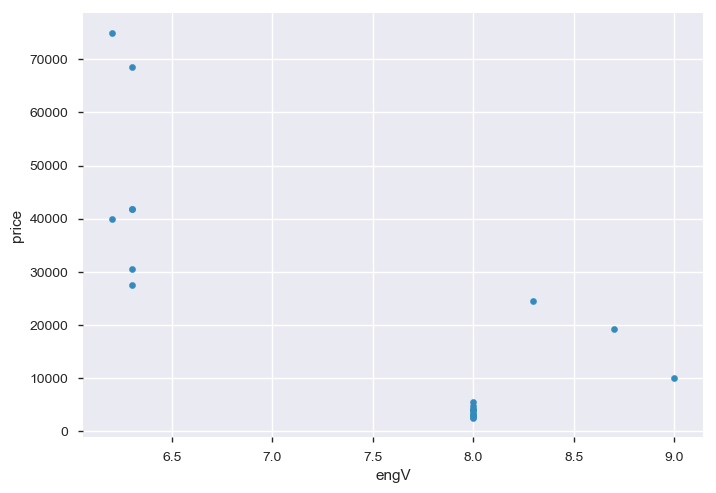

In [55]:
car_sales[car_sales.engV_cat == 'Extreme'].sample(20).plot.scatter(x='engV', y='price')

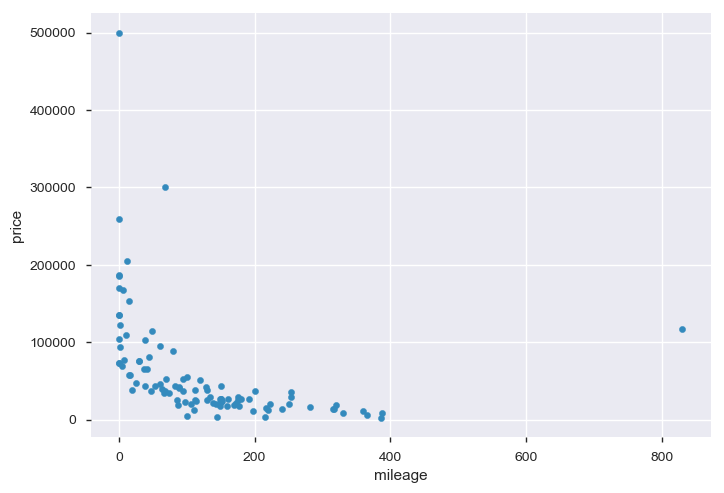

In [56]:
car_sales[car_sales.engV_cat == 'High'].sample(100).plot.scatter(x='mileage', y='price',)

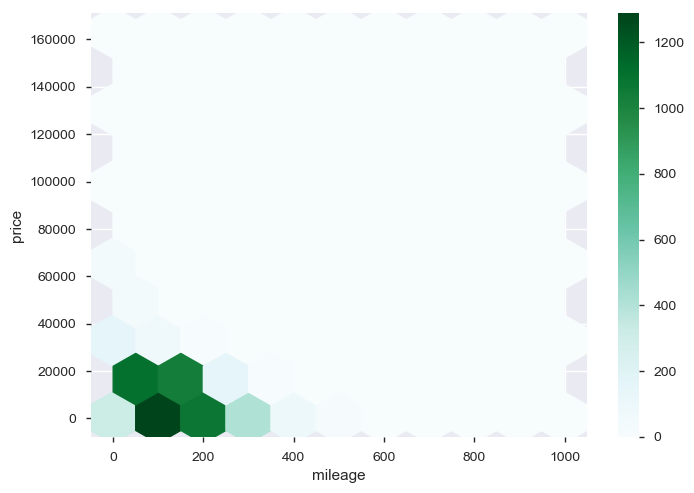

In [57]:
car_sales[car_sales.engV_cat == 'Low'].plot.hexbin(x='mileage',y='price',gridsize=10)

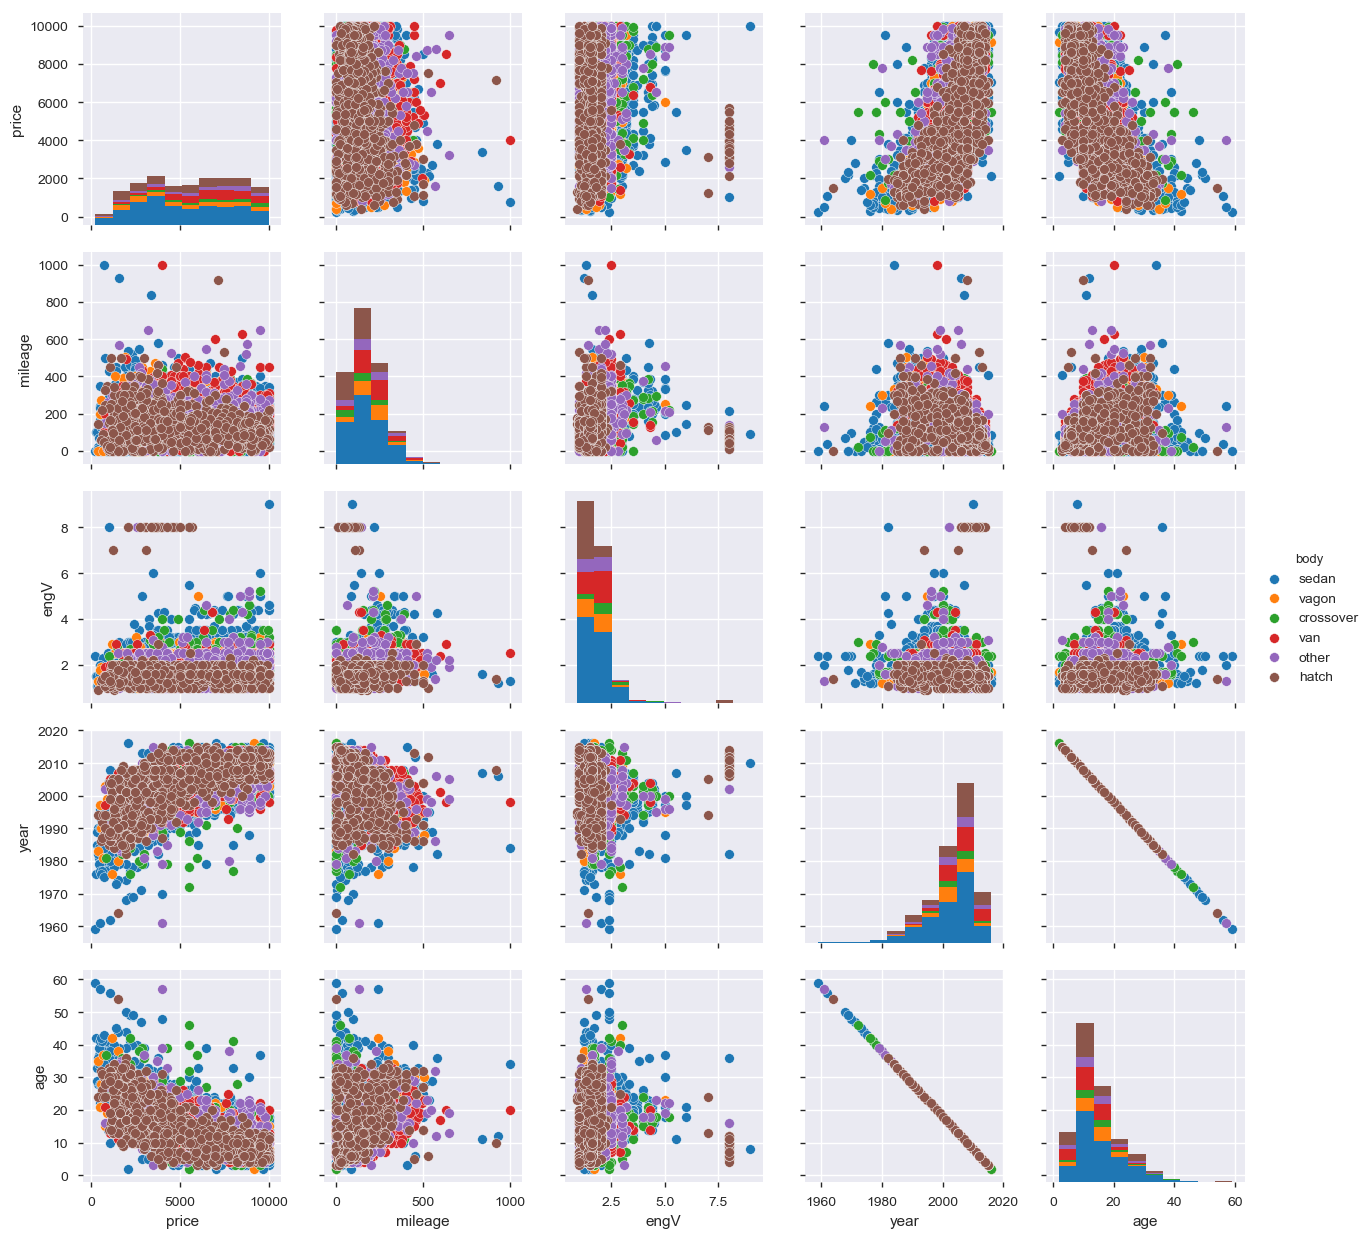

In [58]:
sns.pairplot(data=car_sales[car_sales.price_cat=='Low'],hue='body')

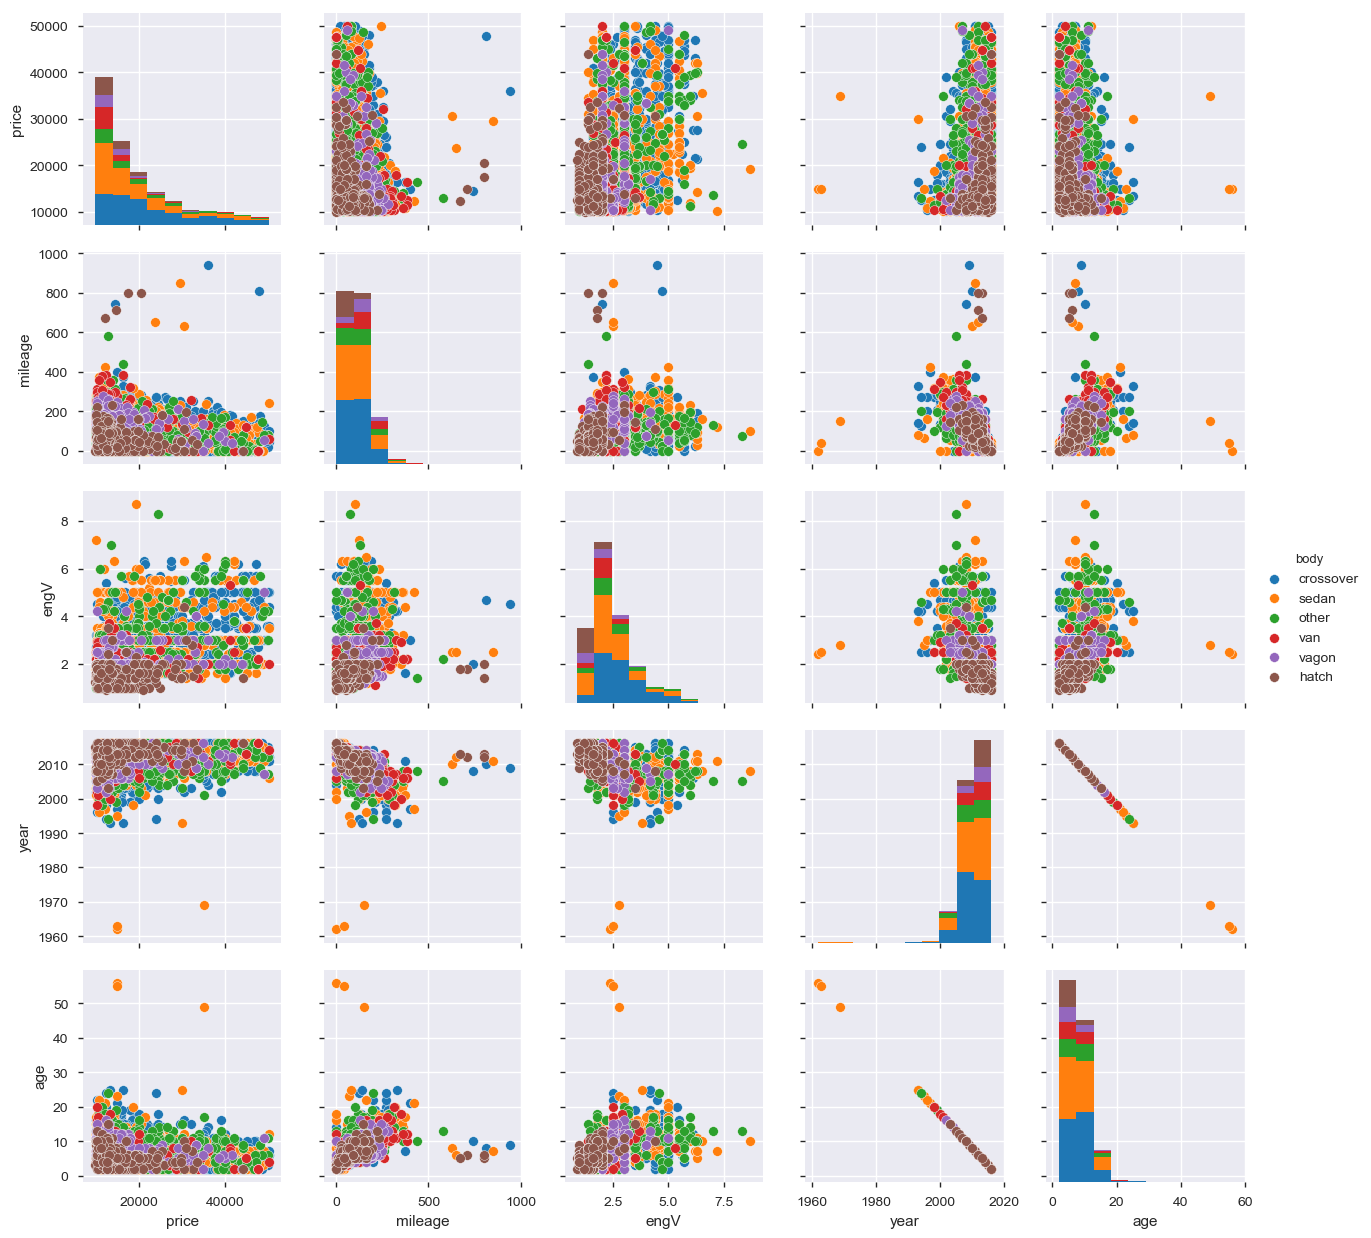

In [59]:
sns.pairplot(data=car_sales[car_sales.price_cat=='Moderate'],hue='body')

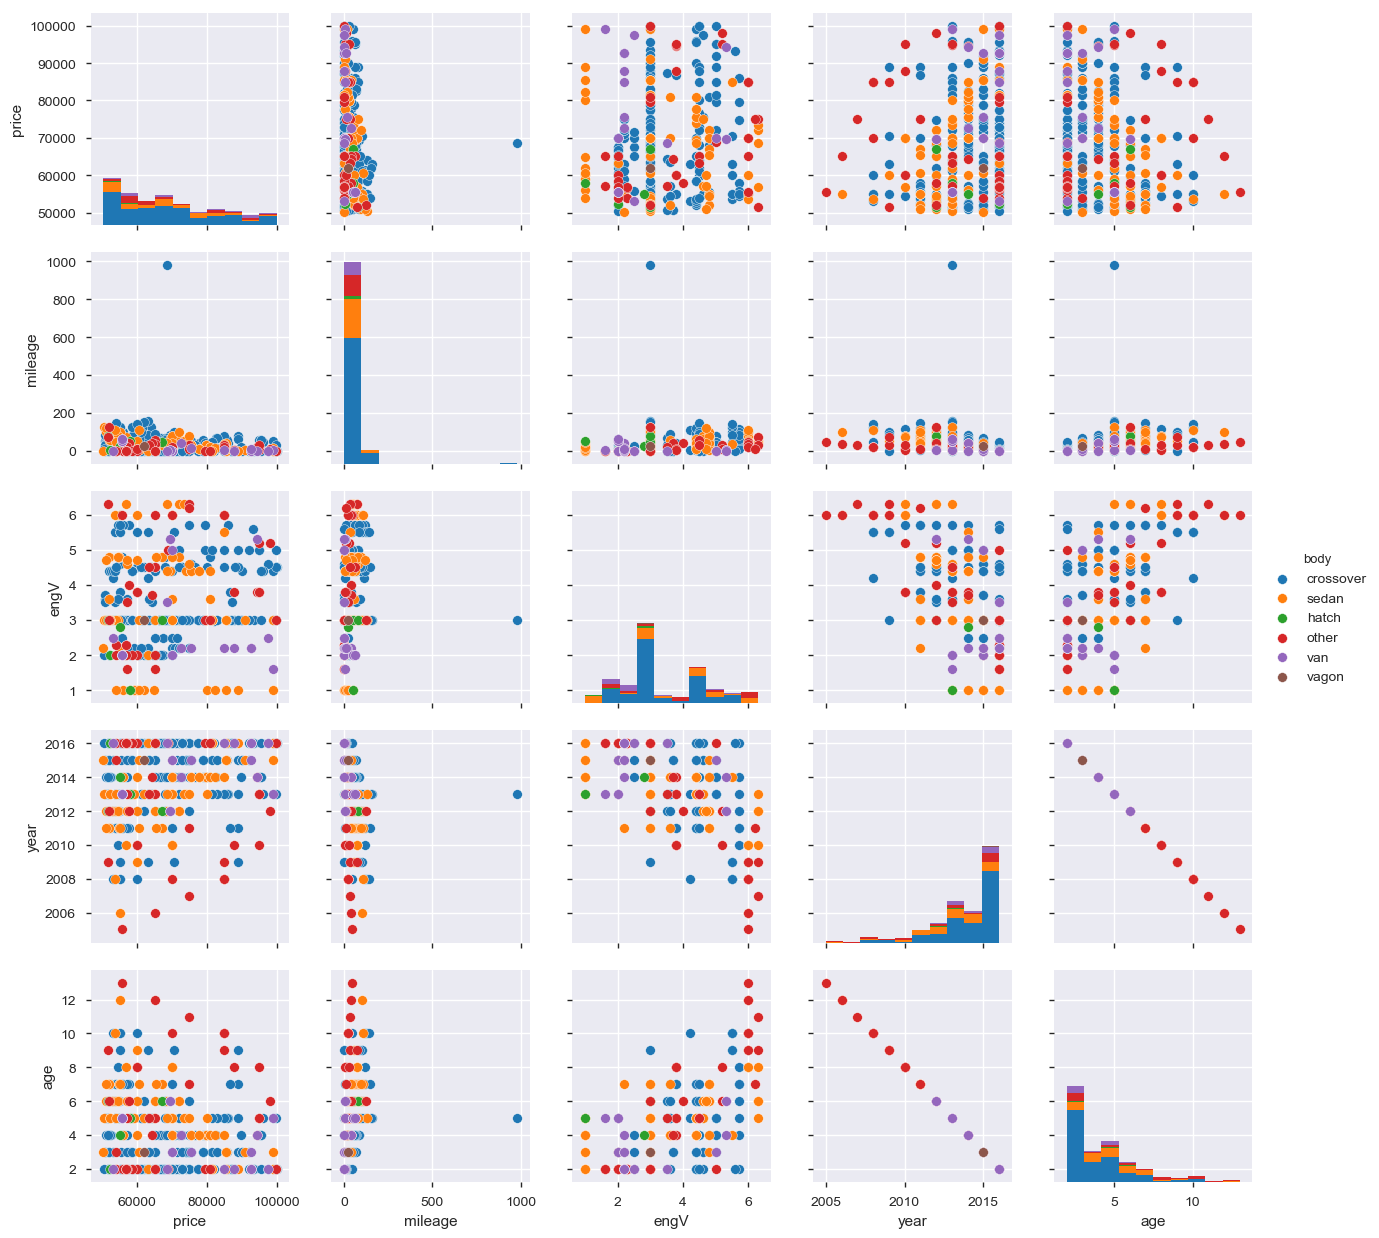

In [60]:
sns.pairplot(data=car_sales[car_sales.price_cat=='High'],hue='body')

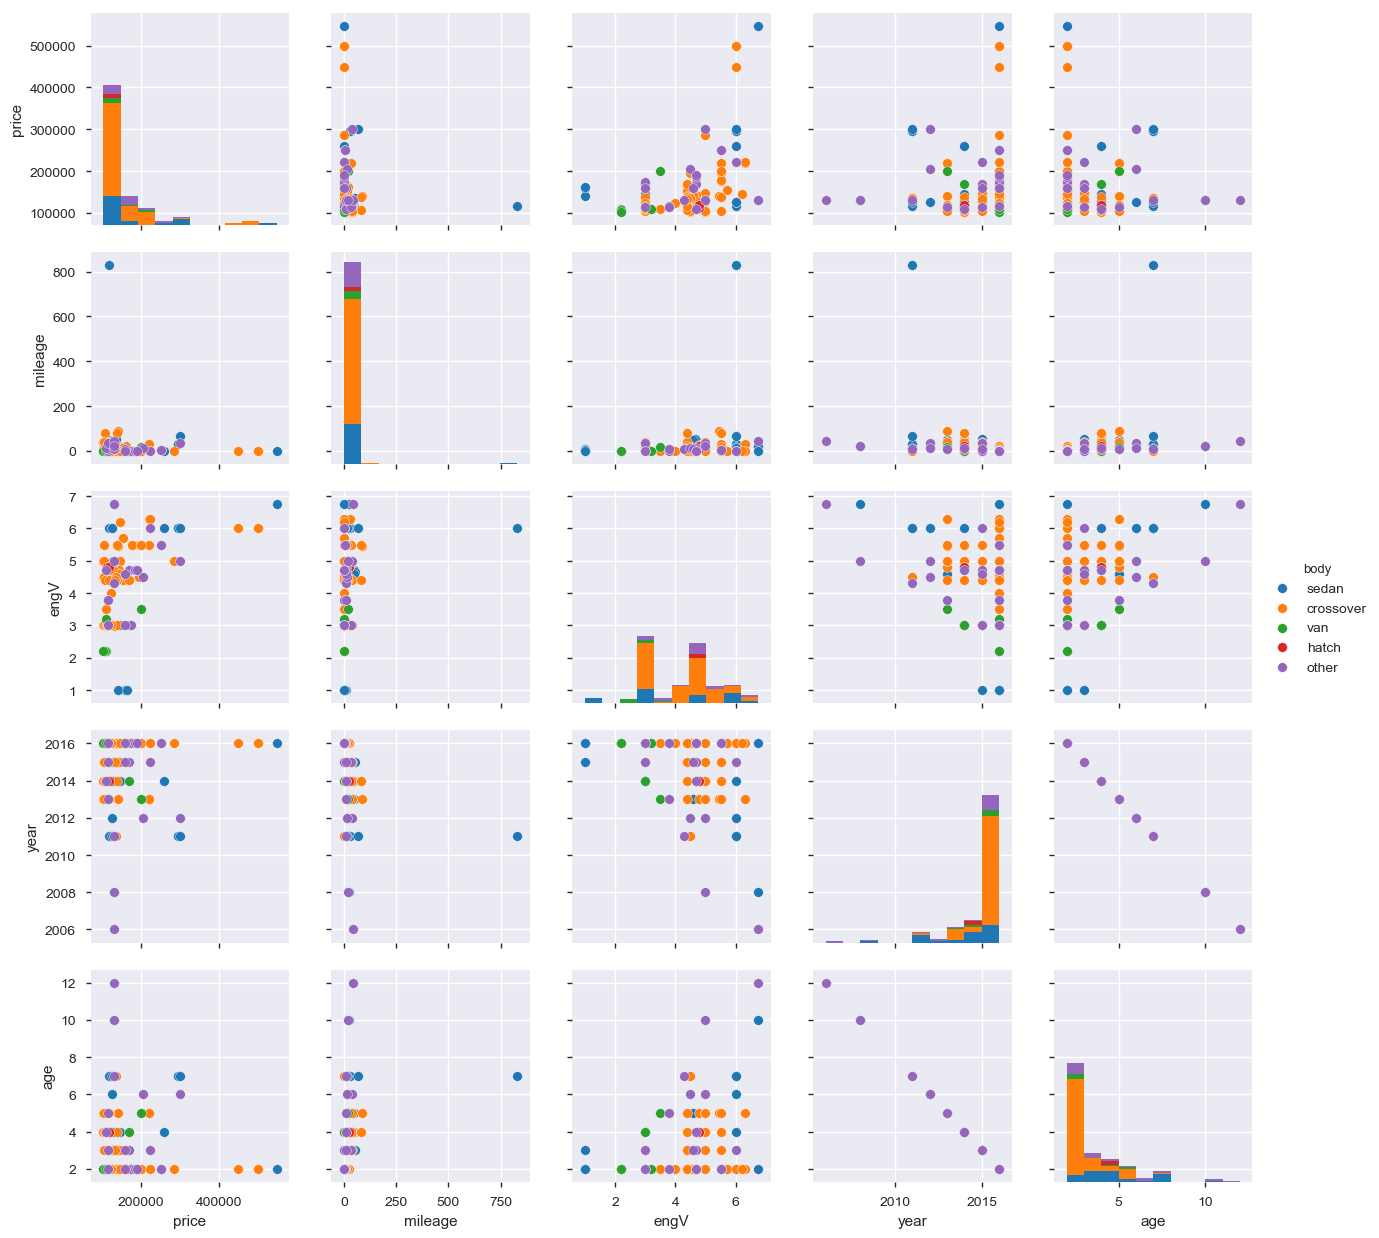

In [61]:
sns.pairplot(data=car_sales[car_sales.price_cat=='Extreme'],hue='body')

In [62]:
car_sales.corr()

,price,mileage,engV,year,age
price,1.000000,-0.338373,0.457694,0.392667,-0.392667
mileage,-0.338373,1.000000,-0.000511,-0.505119,0.505119
engV,0.457694,-0.000511,1.000000,0.070370,-0.070370
year,0.392667,-0.505119,0.070370,1.000000,-1.000000
age,-0.392667,0.505119,-0.070370,-1.000000,1.000000


In [63]:
car_sales[car_sales.body == 'sedan'].corr()

,price,mileage,engV,year,age
price,1.000000,-0.269295,0.387768,0.352127,-0.352127
mileage,-0.269295,1.000000,0.138694,-0.482630,0.482630
engV,0.387768,0.138694,1.000000,-0.000071,0.000071
year,0.352127,-0.482630,-0.000071,1.000000,-1.000000
age,-0.352127,0.482630,0.000071,-1.000000,1.000000


In [64]:
car_sales[car_sales.price_cat == 'Moderate'].corr()

,price,mileage,engV,year,age
price,1.000000,-0.279631,0.388967,0.304237,-0.304237
mileage,-0.279631,1.000000,0.258057,-0.594941,0.594941
engV,0.388967,0.258057,1.000000,-0.434907,0.434907
year,0.304237,-0.594941,-0.434907,1.000000,-1.000000
age,-0.304237,0.594941,0.434907,-1.000000,1.000000


In [65]:
car_sales[car_sales.price_cat == 'High'].corr()

,price,mileage,engV,year,age
price,1.000000,-0.234317,0.111366,0.270327,-0.270327
mileage,-0.234317,1.000000,0.182791,-0.394123,0.394123
engV,0.111366,0.182791,1.000000,-0.553912,0.553912
year,0.270327,-0.394123,-0.553912,1.000000,-1.000000
age,-0.270327,0.394123,0.553912,-1.000000,1.000000


In [66]:
car_sales[car_sales.price_cat == 'Extreme'].corr()

,price,mileage,engV,year,age
price,1.000000,-0.052924,0.502040,-0.019889,0.019889
mileage,-0.052924,1.000000,0.170328,-0.313330,0.313330
engV,0.502040,0.170328,1.000000,-0.399616,0.399616
year,-0.019889,-0.313330,-0.399616,1.000000,-1.000000
age,0.019889,0.313330,0.399616,-1.000000,1.000000


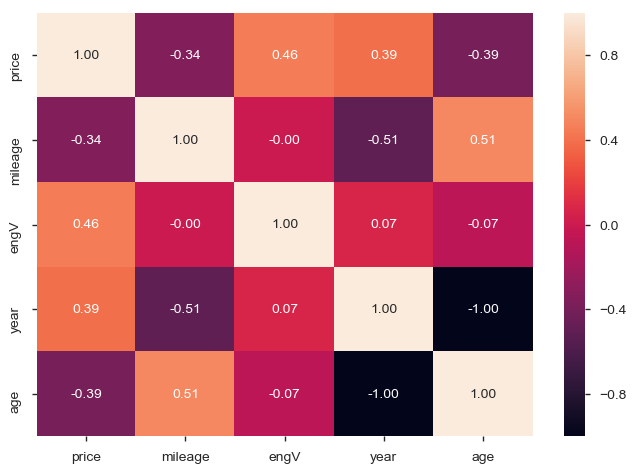

In [67]:
sns.heatmap(car_sales.corr(), annot=True, fmt='.2f')

In [68]:
profile = pandas_profiling.ProfileReport(car_sales)
profile.to_file(outputfile="car_sales_after_preprocessing.html")